In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split

sys.path.append("../library")
import RecSys as rs
import specifyLibrary as sl
path = "../clean_data/"

In [2]:
chefmozGeo_r = pd.read_csv(path + "chefmozGeo_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
chefmozProfile_r = pd.read_csv(path + "chefmozProfile_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
rating_final_r = pd.read_csv(path + "rating_final_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userChefmozRelation_r = pd.read_csv(path + "userChefmozRelation_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userGeo_r = pd.read_csv(path + "userGeo_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)
userProfile_r = pd.read_csv(path + "userProfile_r.csv", sep=';').drop(['Unnamed: 0'],axis=1)

In [3]:
userProfile_r.head()

,userID,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,religion,activity,need_Parking,Rcuisine_Type,Upayment_accepts
0,1,yes,abstemious,informal,family,on foot,single,independent,none,student,no,North_American,no
1,2,yes,abstemious,informal,family,public,single,independent,Catholic,student,no,South_American,no
2,3,yes,social drinker,formal,family,public,single,independent,Catholic,student,no,South_American,no
3,4,yes,abstemious,informal,family,public,single,independent,none,professional,no,Breakfast;Asian;European;Bakery;South_American...,yes
4,5,yes,abstemious,other,family,public,single,independent,Catholic,student,no,North_American,no


In [4]:
rating_final_r.head()

,userID,placeID,rating,food_rating,service_rating
0,77,87,2,2,2
1,77,1,2,2,2
2,77,35,1,2,2
3,68,45,1,1,2
4,68,58,0,0,0


In [5]:
userChefmozRelation_r.head()

,userID,placeID,rating,food_rating,service_rating
0,77,87,1,1,1
1,77,1,1,1,1
2,77,35,0,1,1
3,68,45,0,0,1
4,68,58,-1,-1,-1


In [6]:
import random
random.seed(1234)
train, test = train_test_split(rating_final_r, test_size=0.2)
random.seed(1234)
train2, test2 = train_test_split(userChefmozRelation_r, test_size=0.2)

In [7]:
test.head()

,userID,placeID,rating,food_rating,service_rating
506,32,52,1,1,0
135,55,2,2,2,2
458,54,41,2,2,1
841,50,58,0,2,0
634,29,65,1,1,1


# Most Popular Restaurant

## Most visited Restaurant

In [8]:
train.shape

(698, 5)

In [9]:
train2.shape

(698, 5)

In [10]:
train[train['placeID']==87].shape

(31, 5)

In [11]:
train2[train2['placeID']==87].shape

(33, 5)

In [12]:
mostVisited = train.groupby('placeID')['userID'].count()
mostVisited2 = train2.groupby('placeID')['userID'].count()

In [13]:
train.head()

,userID,placeID,rating,food_rating,service_rating
109,63,45,1,2,1
449,121,68,2,2,2
271,24,73,1,2,0
454,13,92,2,1,1
587,33,76,2,1,0


In [14]:
mostVisited.sort_values(ascending=False).head(10)

placeID
87    31
1     27
85    24
41    20
35    17
52    17
18    15
27    14
77    14
22    14
Name: userID, dtype: int64

In [15]:
mostVisitedRestaurant = list(mostVisited.sort_values(ascending=False).index)
mostVisitedRestaurant2 = list(mostVisited2.sort_values(ascending=False).index)

In [16]:
mostVisitedRestaurant[:5]

[87, 1, 85, 41, 35]

In [17]:
mostVisitedRestaurant2[:5]

[87, 1, 85, 52, 41]

## Most Rated Restaurant

In [18]:
train.groupby('placeID')['rating'].count().head()

placeID
0     5
1    27
2     7
3     3
4     4
Name: rating, dtype: int64

In [19]:
train2.groupby('placeID')['rating'].count().head()

placeID
0     2
1    26
2     9
3     3
4     5
Name: rating, dtype: int64

In [20]:
mostRated = train.groupby('placeID')['rating'].sum()
mostRated2 = train2.groupby('placeID')['rating'].sum()

In [21]:
mostRated.sort_values(ascending=False).head(10)

placeID
87    41
1     32
85    28
22    23
41    22
35    22
18    21
77    18
52    17
86    17
Name: rating, dtype: int64

In [22]:
mostRated2.sort_values(ascending=False).head(10)

placeID
87    12
22    10
1      9
86     8
79     8
33     7
76     6
77     6
19     6
15     5
Name: rating, dtype: int64

In [23]:
mostRatedRestaurant = list(mostRated.sort_values(ascending=False).index)
mostRatedRestaurant2 = list(mostRated2.sort_values(ascending=False).index)

## Highest mean rating Restaurant

In [24]:
train.groupby('placeID')['rating'].count().sort_values(ascending=False).head(10)

placeID
87    31
1     27
85    24
41    20
35    17
52    17
18    15
27    14
77    14
22    14
Name: rating, dtype: int64

In [25]:
train.groupby('placeID')['rating'].count().sort_values(ascending=True).head(10)

placeID
91    2
55    2
73    2
75    3
66    3
3     3
93    3
80    3
7     3
70    3
Name: rating, dtype: int64

In [26]:
def filteredListRatedRestaurant(train, min_ratings=0):
    listRatedRestaurant = train.groupby('placeID')['rating'].apply(list).reset_index()
    filteredListRatedRestaurant = listRatedRestaurant[listRatedRestaurant.rating.apply(lambda x: len(x)>=min_ratings)]
    meanListRatedRestaurant = filteredListRatedRestaurant['rating'].apply(np.mean)
    filteredListRatedRestaurant['mean'] = meanListRatedRestaurant
    return filteredListRatedRestaurant.sort_values('mean',ascending=False)

In [27]:
filteredListRatedRestaurant(train).head(10)

,placeID,rating,mean
32,32,"[2, 2, 2, 2, 2]",2.000000
34,34,"[2, 2, 2, 2, 2]",2.000000
79,79,"[2, 2, 2, 2]",2.000000
65,65,"[2, 2, 2]",2.000000
37,37,"[2, 2, 1, 2]",1.750000
33,33,"[0, 2, 2, 2, 2, 2, 2]",1.714286
23,23,"[2, 2, 1, 2, 1, 2, 1, 2, 2]",1.666667
76,76,"[2, 2, 1, 2, 2, 0, 2, 2, 2]",1.666667
75,75,"[1, 2, 2]",1.666667
36,36,"[0, 2, 2, 2, 2, 2]",1.666667


In [28]:
filteredListRatedRestaurant(train,5).head(10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,placeID,rating,mean
34,34,"[2, 2, 2, 2, 2]",2.000000
32,32,"[2, 2, 2, 2, 2]",2.000000
33,33,"[0, 2, 2, 2, 2, 2, 2]",1.714286
76,76,"[2, 2, 1, 2, 2, 0, 2, 2, 2]",1.666667
36,36,"[0, 2, 2, 2, 2, 2]",1.666667
23,23,"[2, 2, 1, 2, 1, 2, 1, 2, 2]",1.666667
22,22,"[2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2]",1.642857
0,0,"[1, 2, 2, 2, 1]",1.600000
19,19,"[2, 0, 1, 2, 2, 2, 2, 2, 1, 2]",1.600000
2,2,"[2, 2, 1, 2, 1, 0, 2]",1.428571


In [29]:
filteredListRatedRestaurant(train,10).head(10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,placeID,rating,mean
22,22,"[2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2]",1.642857
19,19,"[2, 0, 1, 2, 2, 2, 2, 2, 1, 2]",1.600000
85,86,"[2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2]",1.416667
83,83,"[2, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 0]",1.416667
39,39,"[2, 2, 1, 2, 1, 0, 1, 1, 2, 2]",1.400000
18,18,"[2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0]",1.400000
86,87,"[2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 0, 1, ...",1.322581
35,35,"[1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, ...",1.294118
77,77,"[2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0]",1.285714
69,69,"[2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1]",1.272727


In [30]:
rating_final_r['rating'].max()

2

## Excluding bad Rate

In [31]:
def filteredListRatedRestaurantExcluding(train, excludingRate=0, min_ratings=0):
    trainExcluding = train[train['rating']>=excludingRate]
    listRatedRestaurant = trainExcluding.groupby('placeID')['rating'].apply(list).reset_index()
    filteredListRatedRestaurant = listRatedRestaurant[listRatedRestaurant.rating.apply(lambda x: len(x)>=min_ratings)]
    meanListRatedRestaurant = filteredListRatedRestaurant['rating'].apply(np.mean)
    filteredListRatedRestaurant['mean'] = meanListRatedRestaurant
    return filteredListRatedRestaurant.sort_values('mean',ascending=False)

In [32]:
filteredListRatedRestaurantExcluding(train).head()

,placeID,rating,mean
32,32,"[2, 2, 2, 2, 2]",2.00
34,34,"[2, 2, 2, 2, 2]",2.00
79,79,"[2, 2, 2, 2]",2.00
65,65,"[2, 2, 2]",2.00
37,37,"[2, 2, 1, 2]",1.75


In [33]:
filteredListRatedRestaurantExcluding(train2,-1).head()

,placeID,rating,mean
0,0,"[1, 1]",1.0
79,79,"[1, 1, 1, 1, 1, 1, 1, 1]",1.0
50,50,"[1, 1]",1.0
70,70,"[1, 1, 1, 1]",1.0
36,36,"[1, 1, 1, 1, 1]",1.0


In [34]:
filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=5)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,placeID,rating,mean
34,34,"[2, 2, 2, 2, 2]",2.000000
33,33,"[2, 2, 2, 2, 2, 2]",2.000000
32,32,"[2, 2, 2, 2, 2]",2.000000
36,36,"[2, 2, 2, 2, 2]",2.000000
76,76,"[2, 2, 1, 2, 2, 2, 2, 2]",1.875000
19,19,"[2, 1, 2, 2, 2, 2, 2, 1, 2]",1.777778
22,22,"[2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2]",1.769231
15,15,"[2, 2, 2, 2, 2, 1, 1, 2]",1.750000
69,69,"[2, 2, 2, 2, 2, 2, 1, 1]",1.750000
40,40,"[2, 1, 2, 2, 2, 1, 2]",1.714286


In [35]:
filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=10)

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,placeID,rating,mean
22,22,"[2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2]",1.769231
83,83,"[2, 2, 2, 1, 2, 2, 1, 2, 1, 2]",1.700000
41,41,"[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2]",1.692308
18,18,"[2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1]",1.615385
86,87,"[2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, ...",1.576923
84,85,"[2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, ...",1.555556
85,86,"[2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2]",1.545455
1,1,"[2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, ...",1.523810
77,77,"[2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1]",1.500000
27,27,"[2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1]",1.454545


## Metrics for recommender systems

In [36]:
def recall_at_n(N, test, recommended, train=None):
    """
    :param N: number of recommendations
    :param test: list of movies seen by user in test
    :param train: list of movies seen by user in train. This has to be removed from the recommended list 
    :param recommended: list of movies recommended
    
    :return the recall
    """
    if train is not None: # Remove items in train
        # Esta línea de abajo estaría mal!!! por qué? Respuesta: al usar "set", perdemos el orden en la recomendación
        # rec_true =  set(recommended)- set(train)
        
        # Correct implementation
        rec_true = []
        for r in recommended:
            if r not in train:
                rec_true.append(r)
        # Equivalent 1-line of code:
        # rec_true = [r for r in recommended if r not in train]
    else:
        rec_true = recommended    
    intersection = len(set(test) & set(rec_true[:N]))
    return intersection / float(np.minimum(N, len(test)))

In [37]:
seen = [135025,135028,135023,135021,135026]
recommended = [135021,135024]
print(recall_at_n(1, seen, recommended))
print(recall_at_n(2, seen, recommended))
print(recall_at_n(3, seen, recommended))
print(recall_at_n(5, seen, recommended))
print(recall_at_n(10, seen, recommended))

1.0
0.5
0.3333333333333333
0.2
0.2


# Now Merge Test and Train

In [38]:
trainPlaceList = train.groupby('userID')['placeID'].apply(list).reset_index()
trainPlaceList2 = train2.groupby('userID')['placeID'].apply(list).reset_index()

In [39]:
testPlaceList = test.groupby('userID')['placeID'].apply(list).reset_index()
testPlaceList2 = test2.groupby('userID')['placeID'].apply(list).reset_index()

In [40]:
joined = pd.merge(trainPlaceList, testPlaceList, how='inner', on='userID', suffixes=('_train', '_test')).set_index('userID')
joined2 = pd.merge(trainPlaceList2, testPlaceList2, how='inner', on='userID', suffixes=('_train', '_test')).set_index('userID')

In [41]:
joined.head()

,placeID_train,placeID_test
userID,,
1,"[22, 69, 87]",[1]
2,"[27, 31, 15, 2, 77, 41, 87]","[33, 1]"
3,"[12, 25, 1, 33, 83, 39, 76]","[65, 15, 27, 70]"
4,"[2, 35, 86, 32, 85, 26]",[63]
6,"[62, 44, 25, 23, 26, 1, 65, 54]","[6, 76]"


In [42]:
joined2.head()

,placeID_train,placeID_test
userID,,
4,"[2, 86, 63, 35, 26]","[85, 32]"
5,"[71, 18, 24, 85]",[27]
6,"[25, 6, 44, 1, 26, 62, 76, 54]","[65, 23]"
7,"[9, 24, 87, 22]","[82, 85, 62]"
8,"[17, 53, 43, 8, 91, 30, 11]",[20]


In [43]:
# calculate the recall of the mostRatedMovies recommendation, for each user:
joined.apply(lambda l: recall_at_n(N=15, test=l[1], recommended=mostRatedRestaurant, train=l[0]), axis=1).head()

userID
1    1.0
2    0.5
3    0.5
4    0.0
6    0.5
dtype: float64

In [44]:
# calculate the recall of the mostRatedMovies recommendation, for each user:
joined2.apply(lambda l: recall_at_n(N=15, test=l[1], recommended=mostRatedRestaurant2, train=l[0]), axis=1).head()

userID
4    0.0
5    1.0
6    0.5
7    0.0
8    0.0
dtype: float64

In [45]:
def apk(N, test, recommended, train=None):
    """
    Computes the average precision at N given recommendations.
    
    :param N: number of recommendations
    :param test: list of movies seen by user in test
    :param train: list of movies seen by user in train. This has to be removed from the recommended list 
    :param recommended: list of movies recommended
    
    :return The average precision at N over the test set
    """
    if train is not None: 
        rec_true = []
        for r in recommended:
            if r not in train:
                rec_true.append(r)
    else:
        rec_true = recommended    
    predicted = rec_true[:N] # top-k predictions
    
    score = 0.0 # This will store the numerator
    num_hits = 0.0 # This will store the sum of rel(i)

    for i,p in enumerate(predicted):
        if p in test and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits/(i+1.0)
    return score / min(len(test), N)

In [46]:
topN = 1
predictions = mostVisitedRestaurant[:]
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.12
map@10=0.14


In [47]:
topN = 1
predictions = mostVisitedRestaurant2[:]
m1 = joined2.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined2.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.09
map@10=0.12


In [48]:
topN = 1
predictions = mostRatedRestaurant
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.09
map@10=0.13


In [49]:
topN = 1
predictions = mostRatedRestaurant2
m1 = joined2.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined2.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.03
map@10=0.05


In [50]:
topN = 1
predictions = list(filteredListRatedRestaurant(train)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.00
map@10=0.03


In [51]:
topN = 1
predictions = list(filteredListRatedRestaurant(train,5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.00
map@10=0.02


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [52]:
topN = 1
predictions = list(filteredListRatedRestaurant(train,10)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.01
map@10=0.04


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [53]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=1,min_ratings=5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.00
map@10=0.02


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=1)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.02
map@10=0.03


In [55]:
topN = 1
predictions = list(filteredListRatedRestaurantExcluding(train,excludingRate=2,min_ratings=5)['placeID'].values)
m1 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m1))
topN = 10
m2 = joined.apply(lambda l: 
             apk(topN, l[1], predictions, l[0]), axis=1).mean()
print("map@%s=%.2f" % (topN, m2))

map@1=0.09
map@10=0.10


/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Co-occurrence Matrix¶

In [56]:
# create a dictionary of restaurant per user
restaurantPerUser = (train[train['rating']>=1]
                 .groupby('userID')['placeID']
                 .apply(np.array)
                 .to_dict()
                 )

In [57]:
# create a dictionary of restaurant per user
restaurantPerUser2 = (train2[train2['rating']>=0]
                 .groupby('userID')['placeID']
                 .apply(np.array)
                 .to_dict()
                 )

In [58]:
# calculate the number of items in train
n_items = len(chefmozGeo_r['placeID'].unique())
n_items

95

In [59]:
# co-ocurrance matrix will have shape=[n_items,n_items]
coMatrix = np.zeros((n_items, n_items)) # co-occurrence matrix
for user,restaurant in restaurantPerUser.items():
    for r in restaurant:
        coMatrix[r, restaurant] += 1

In [60]:
# co-ocurrance matrix will have shape=[n_items,n_items]
coMatrix2 = np.zeros((n_items, n_items)) # co-occurrence matrix
for user,restaurant in restaurantPerUser2.items():
    for r in restaurant:
        coMatrix2[r, restaurant] += 1

In [61]:
userProfile_r[userProfile_r['userID']==1][['Rcuisine_Type','dress_preference','need_Parking','Upayment_accepts']].values[0]

array(['North_American', 'informal', 'no', 'no'], dtype=object)

In [62]:
userProfile_r.loc(0)[2]

userID                           3
smoker                         yes
drink_level         social drinker
dress_preference            formal
ambience                    family
transport                   public
marital_status              single
hijos                  independent
religion                  Catholic
activity                   student
need_Parking                    no
Rcuisine_Type       South_American
Upayment_accepts                no
Name: 2, dtype: object

In [63]:
userCoMatrix = sl.userCoMatrix(1,userProfile_r,n_items,coMatrix)

../library/specifyLibrary.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if coMatix=='noMatrix':
../library/specifyLibrary.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  userInfo['Rcuisine_Type'] = userInfo['Rcuisine_Type'].map(lambda x: x.split(';'))


In [64]:
userCoMatrix

array([[ 7.,  2.,  2., ...,  2.,  2.,  5.],
       [ 2., 23.,  3., ...,  2.,  2.,  2.],
       [ 2.,  3.,  8., ...,  2.,  2.,  2.],
       ...,
       [ 2.,  2.,  2., ...,  8.,  2.,  2.],
       [ 2.,  2.,  2., ...,  2.,  4.,  2.],
       [ 5.,  2.,  2., ...,  2.,  2.,  6.]])

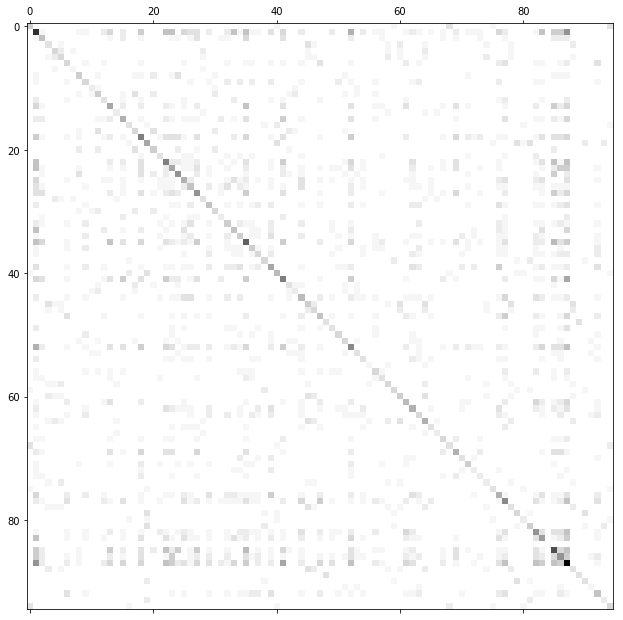

In [65]:
# visualize the matrix
plt.matshow(coMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

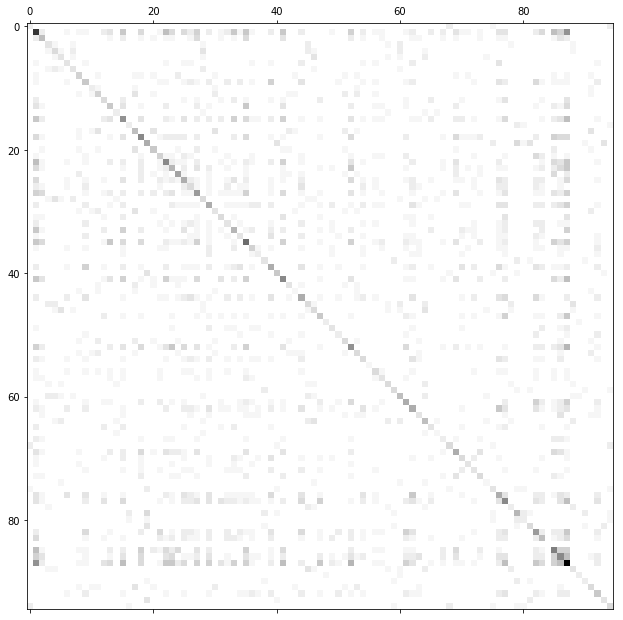

In [66]:
# visualize the matrix
plt.matshow(coMatrix2, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

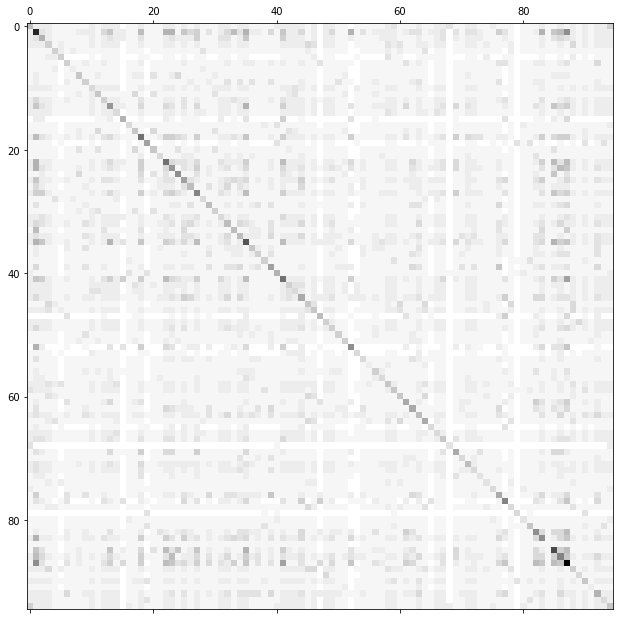

In [67]:
# visualize the matrix
plt.matshow(userCoMatrix, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

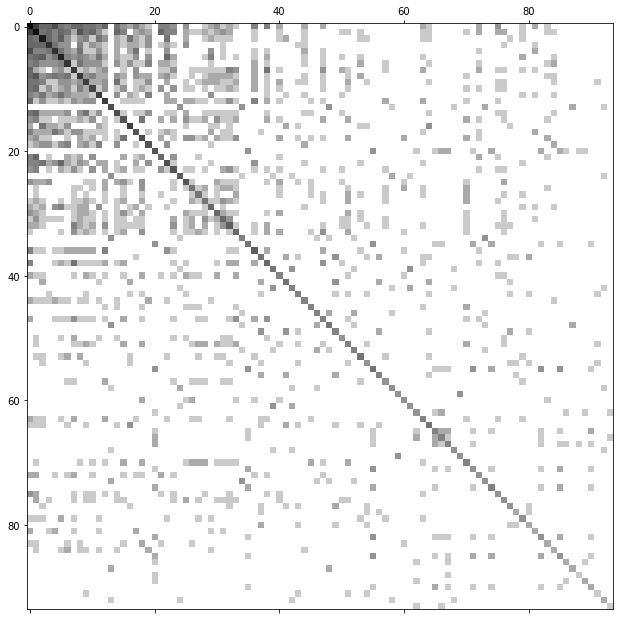

In [68]:
popular_indexing = mostRatedRestaurant
coMatrix_sorted = coMatrix[:,popular_indexing]
coMatrix_sorted_total = coMatrix_sorted[popular_indexing, :]
log_scale = np.log(coMatrix_sorted_total+1.0)
plt.matshow(log_scale, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

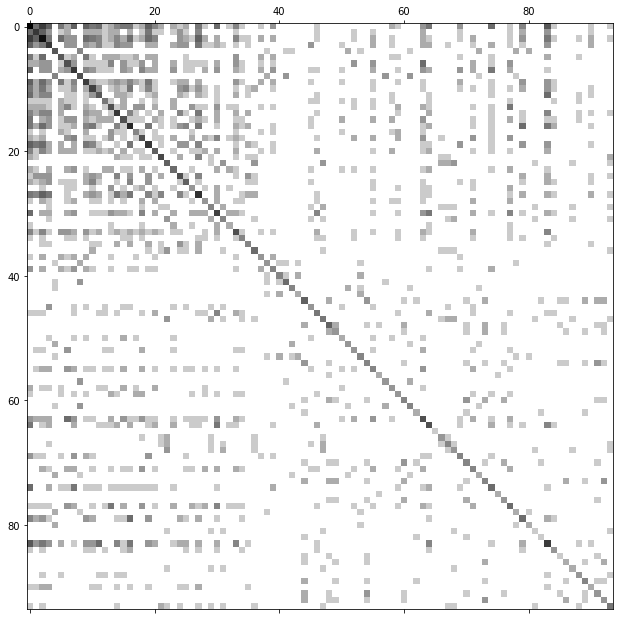

In [69]:
popular_indexing = mostRatedRestaurant2
coMatrix_sorted = coMatrix2[:,popular_indexing]
coMatrix_sorted_total = coMatrix_sorted[popular_indexing, :]
log_scale = np.log(coMatrix_sorted_total+1.0)
plt.matshow(log_scale, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

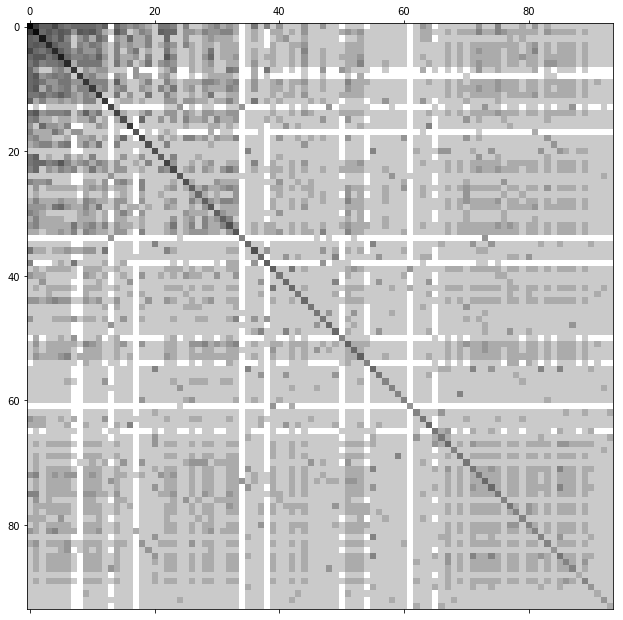

In [70]:
popular_indexing = mostRatedRestaurant
coMatrix_sorted = userCoMatrix[:,popular_indexing]
coMatrix_sorted_total = coMatrix_sorted[popular_indexing, :]
log_scale = np.log(coMatrix_sorted_total+1.0)
plt.matshow(log_scale, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [71]:
def co_occurrance_similarity(item_id, coocurrance, ntop=5):
    """
    Returns the top-N most similar items to a given one, based on the coocurrance matrix
    
    :param item_id: id of input item
    :param cooccurrance: 2-dim numpy array with the co-occurance matrix
    :param ntop: number of items to be retrieved
    
    :return top-N most similar items to the given item_id
    """
    similarItems = coocurrance[item_id, :]
    # return indeces of most similar items in descendign order
    mostSimilar = np.argsort(similarItems)[::-1]
    # remove the item itslef, maybe it's not the first element
    ##### mostSimilar = mostSimilar[1:ntop+1]
    mostSimilar = list(mostSimilar)
    mostSimilar.remove(item_id)
    mostSimilar = np.array(mostSimilar)[:ntop]
    
    # return a numpy array with the index (first column) and the value (second column) of the most similar items
    return np.stack((mostSimilar, similarItems[mostSimilar])).T

In [72]:
# First column are indices, while second one is the frequency of co-ocurrance
co_occurrance_similarity(1, userCoMatrix, 5)

array([[87., 12.],
       [35.,  8.],
       [52.,  8.],
       [83.,  8.],
       [23.,  8.]])

In [73]:
co_occurrance_similarity(1, coMatrix, 5)

array([[87., 11.],
       [52.,  8.],
       [33.,  6.],
       [35.,  6.],
       [22.,  6.]])

In [74]:
co_occurrance_similarity(1, coMatrix, 10)

array([[87., 11.],
       [52.,  8.],
       [33.,  6.],
       [35.,  6.],
       [22.,  6.],
       [23.,  6.],
       [83.,  6.],
       [18.,  5.],
       [86.,  5.],
       [85.,  5.]])

In [75]:
co_occurrance_similarity(49, coMatrix, 5)

array([[87.,  3.],
       [ 1.,  2.],
       [47.,  1.],
       [82.,  1.],
       [37.,  1.]])

In [76]:
def co_occurrance_recommendation(items_id, cooccurrance, ntop=10):
    """
    Obtain the list of ntop recommendations based on a list of items (user history of views)
    
    :param items_id: list of items ids
    :param coocurrence: co-ocurrence matrix (numpy 2-dim array)
    :param ntop: top-K items to be retrieved
    
    :return list of ntop items recommended
    """
    # put together all the similar items and its value. For this, use np.vstack, wich stacks one array after 
    # another (row wise)
    list_sim_items = np.vstack([co_occurrance_similarity(id_, cooccurrance, ntop) for id_ in items_id])
    # Group by id and take the maximum frquency to remove duplicates
    largest_freq = pd.DataFrame(list_sim_items, columns=['id', 'freq']).groupby('id').agg(max).reset_index()
    
    # sort by value in descending order
    sorted_list = largest_freq.sort_values(by='freq', ascending=False)
    
    # get the top N
    out = sorted_list.values[:ntop, 0]
    return out

In [77]:
# get users in train with their movies
trainUsersGrouped = train[train['rating']>=1].groupby('userID')['placeID'].apply(list).reset_index()
testUsersGrouped = test[test['rating']>=1].groupby('userID')['placeID'].apply(list).reset_index()
trainUsersGrouped.head()

,userID,placeID
0,1,"[22, 69]"
1,2,"[27, 31, 15, 2, 77, 41, 87]"
2,3,"[12, 25, 1, 33, 83, 39, 76]"
3,4,"[2, 35, 86, 32, 85, 26]"
4,5,"[85, 18, 24, 27]"


In [78]:
co_occurrance_recommendation([69, 22, 1],coMatrix,5)

array([87., 52.,  1., 22., 33.])

In [79]:
co_occurrance_recommendation([69, 22, 1],userCoMatrix,5)

array([87.,  1., 23., 35., 52.])

In [80]:
Ntop = 5
# Get the recommendations for all users using the apply method
predictions = trainUsersGrouped['placeID'].apply(lambda x: co_occurrance_recommendation(x, coMatrix, Ntop))
predictions.head()

0    [1.0, 85.0, 87.0, 41.0, 18.0]
1    [1.0, 41.0, 87.0, 52.0, 77.0]
2    [87.0, 52.0, 1.0, 35.0, 22.0]
3    [85.0, 35.0, 1.0, 22.0, 87.0]
4    [35.0, 22.0, 87.0, 1.0, 13.0]
Name: placeID, dtype: object

In [81]:
usersIDs = trainUsersGrouped['userID'].values
placeIDs = trainUsersGrouped['placeID'].values

In [82]:
Ntop = 5
predictions = sl.co_occurrance_recommendation_for_list_users(usersIDs,placeIDs,coMatrix,userProfile_r,n_items,Ntop)
predictions = pd.DataFrame({'predictions_userCoMatrix':predictions})
predictions.head()

../library/specifyLibrary.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if coMatix=='noMatrix':
../library/specifyLibrary.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  userInfo['Rcuisine_Type'] = userInfo['Rcuisine_Type'].map(lambda x: x.split(';'))


,predictions_userCoMatrix
0,"[1.0, 41.0, 85.0, 87.0, 18.0]"
1,"[1.0, 87.0, 41.0, 22.0, 85.0]"
2,"[87.0, 52.0, 83.0, 1.0, 22.0]"
3,"[1.0, 13.0, 22.0, 85.0, 35.0]"
4,"[35.0, 1.0, 22.0, 87.0, 13.0]"


In [83]:
topN = 5
# add a prediction column to train
trainUsersGrouped['prediction_coMatrix'] = trainUsersGrouped['placeID'].apply(
    lambda x: co_occurrance_recommendation(x, coMatrix, topN)
)
trainUsersGrouped['predictions_userCoMatrix'] = predictions['predictions_userCoMatrix']

In [84]:
trainUsersGrouped.head()

,userID,placeID,prediction_coMatrix,predictions_userCoMatrix
0,1,"[22, 69]","[1.0, 85.0, 87.0, 41.0, 18.0]","[1.0, 41.0, 85.0, 87.0, 18.0]"
1,2,"[27, 31, 15, 2, 77, 41, 87]","[1.0, 41.0, 87.0, 52.0, 77.0]","[1.0, 87.0, 41.0, 22.0, 85.0]"
2,3,"[12, 25, 1, 33, 83, 39, 76]","[87.0, 52.0, 1.0, 35.0, 22.0]","[87.0, 52.0, 83.0, 1.0, 22.0]"
3,4,"[2, 35, 86, 32, 85, 26]","[85.0, 35.0, 1.0, 22.0, 87.0]","[1.0, 13.0, 22.0, 85.0, 35.0]"
4,5,"[85, 18, 24, 27]","[35.0, 22.0, 87.0, 1.0, 13.0]","[35.0, 1.0, 22.0, 87.0, 13.0]"


In [85]:
joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))

In [86]:
joined.head()

,userID,placeID_train,prediction_coMatrix,predictions_userCoMatrix,placeID_test
0,1,"[22, 69]","[1.0, 85.0, 87.0, 41.0, 18.0]","[1.0, 41.0, 85.0, 87.0, 18.0]",[1]
1,2,"[27, 31, 15, 2, 77, 41, 87]","[1.0, 41.0, 87.0, 52.0, 77.0]","[1.0, 87.0, 41.0, 22.0, 85.0]","[33, 1]"
2,3,"[12, 25, 1, 33, 83, 39, 76]","[87.0, 52.0, 1.0, 35.0, 22.0]","[87.0, 52.0, 83.0, 1.0, 22.0]","[65, 15, 70]"
3,4,"[2, 35, 86, 32, 85, 26]","[85.0, 35.0, 1.0, 22.0, 87.0]","[1.0, 13.0, 22.0, 85.0, 35.0]",[63]
4,6,"[62, 44, 25, 23, 26, 1, 65, 54]","[87.0, 52.0, 33.0, 35.0, 1.0]","[87.0, 52.0, 22.0, 83.0, 86.0]","[6, 76]"


In [87]:
topN = 5
recall = joined.apply(lambda l: 
             recall_at_n(N=topN, test=l[4], recommended=l[2], train=l[1]), axis=1).mean()
print("recall@%s=%.3f"%(topN, recall))

recall@5=0.265


In [88]:
topN = 5
recall = joined.apply(lambda l: 
             recall_at_n(N=topN, test=l[4], recommended=l[3], train=l[1]), axis=1).mean()
print("recall@%s=%.3f"%(topN, recall))

recall@5=0.247


In [89]:
# do the same for different top k values. It might be convenient to define a function!
def evaluate_recall(topN, trainGrouped, testGrouped, coMatrix, popularity_baseline):
    # add a prediction column to train
    trainUsersGrouped['prediction'] = trainUsersGrouped['placeID'].apply(
        lambda x: co_occurrance_recommendation(x, coMatrix, topN)
    )
    # join with test data
    joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))
    # calculate average recall_coMatrix
    recall = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[4], recommended=l[2], train=l[1]), axis=1).mean()
    print("Co-occurance model: recall@%s=%.3f"%(topN, recall))
    # calculate average recall_userCoMatrix
    recall = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[4], recommended=l[3], train=l[1]), axis=1).mean()
    print("Co-occurance User model: recall@%s=%.3f"%(topN, recall))
    # calculate average recall for the baseline
    recall_baseline = joined.apply(lambda l: 
                 recall_at_n(N=topN, test=l[4], recommended=popularity_baseline, train=l[1]), axis=1).mean()
    print("Popularity model: recall@%s=%.3f"%(topN, recall_baseline))    
    return recall, recall_baseline

In [90]:
for k in [3,5,10,30,50,100]:
    print('-----------')
    evaluate_recall(k, trainUsersGrouped, testUsersGrouped, coMatrix, mostRatedRestaurant[:]);

-----------
Co-occurance model: recall@3=0.608
Co-occurance User model: recall@3=0.554
Popularity model: recall@3=0.300
-----------
Co-occurance model: recall@5=0.685
Co-occurance User model: recall@5=0.535
Popularity model: recall@5=0.323
-----------
Co-occurance model: recall@10=0.339
Co-occurance User model: recall@10=0.316
Popularity model: recall@10=0.388
-----------
Co-occurance model: recall@30=0.114
Co-occurance User model: recall@30=0.112
Popularity model: recall@30=0.568
-----------
Co-occurance model: recall@50=0.068
Co-occurance User model: recall@50=0.067
Popularity model: recall@50=0.631
-----------
Co-occurance model: recall@100=0.036
Co-occurance User model: recall@100=0.036
Popularity model: recall@100=0.939


In [91]:
def evaluate_map(topN, trainGrouped, testGrouped, coMatrix, popularity_baseline):
    # add a prediction column to train
    trainUsersGrouped['prediction'] = trainUsersGrouped['placeID'].apply(
        lambda x: co_occurrance_recommendation(x, coMatrix, topN)
    )
    # join with test data
    joined = pd.merge(trainUsersGrouped, testUsersGrouped, how='inner', on='userID', suffixes=('_train', '_test'))
    # calculate average recall
    map_ = joined.apply(lambda l: 
             apk(N=topN, test=l[4], recommended=l[2], train=l[1]), axis=1).mean()
    print("Co-occurance model: map@%s=%.3f"%(topN, map_))
    # calculate average recall UserCoMatrix
    map_ = joined.apply(lambda l: 
             apk(N=topN, test=l[4], recommended=l[3], train=l[1]), axis=1).mean()
    print("Co-occurance UserCoMatrix model: map@%s=%.3f"%(topN, map_))
    
    map_baseline = joined.apply(lambda l: 
                 apk(N=topN, test=l[4], recommended=popularity_baseline, train=l[1]), axis=1).mean()
    print("Popularity model: map@%s=%.3f"%(topN, map_baseline))
    return map_, map_baseline

In [92]:
for k in [3,5,10,30,50,100]:
    print('-------')
    evaluate_map(k, trainUsersGrouped, testUsersGrouped, coMatrix, mostRatedRestaurant[:]);

-------
Co-occurance model: map@3=0.603
Co-occurance UserCoMatrix model: map@3=0.542
Popularity model: map@3=0.250
-------
Co-occurance model: map@5=0.685
Co-occurance UserCoMatrix model: map@5=0.518
Popularity model: map@5=0.278
-------
Co-occurance model: map@10=0.339
Co-occurance UserCoMatrix model: map@10=0.314
Popularity model: map@10=0.335
-------
Co-occurance model: map@30=0.114
Co-occurance UserCoMatrix model: map@30=0.112
Popularity model: map@30=0.443
-------
Co-occurance model: map@50=0.068
Co-occurance UserCoMatrix model: map@50=0.067
Popularity model: map@50=0.504
-------
Co-occurance model: map@100=0.036
Co-occurance UserCoMatrix model: map@100=0.036
Popularity model: map@100=0.939


# Oher distances

In [93]:
# note that the diagonal of CoMatrix provides the number of visualizations of each movie
np.diag(coMatrix)

array([ 5., 21.,  6.,  3.,  4.,  4.,  4.,  1.,  5.,  4.,  2.,  5.,  3.,
        9.,  2.,  8.,  3.,  4., 13.,  9.,  5.,  3., 13.,  9., 11.,  8.,
        6., 11.,  3.,  6.,  4.,  2.,  5.,  6.,  5., 16.,  5.,  4.,  4.,
        9.,  7., 13.,  3.,  2.,  7.,  5.,  4.,  6.,  3.,  3.,  4.,  4.,
       12.,  3.,  3.,  1.,  4.,  3.,  4.,  4.,  5.,  7.,  8.,  4.,  8.,
        3.,  2.,  4.,  3.,  8.,  3.,  5.,  2.,  2.,  2.,  3.,  8., 12.,
        3.,  4.,  2.,  5., 11., 10.,  0., 18., 11., 26.,  3.,  3.,  3.,
        1.,  6.,  2.,  4.])

In [94]:
jaccard = np.zeros((n_items, n_items)) # Jaccard similarity matrix
for i, row in enumerate(coMatrix):
    if row[i]!=0: # Case where the diagonal is not empty, i.e. coM(i,i)!=0
        jaccard[i,:] = row/(row[i]+np.diag(coMatrix)-row)
    else: # case where the diagonal is empty. We have to aasign a similarity of 1 to item pairs without ratings
        for j in np.arange(n_items):
            if coMatrix[j,j]==0:
                jaccard[i,j] = 1.0
            else: 
                jaccard[i,j] = 0.0

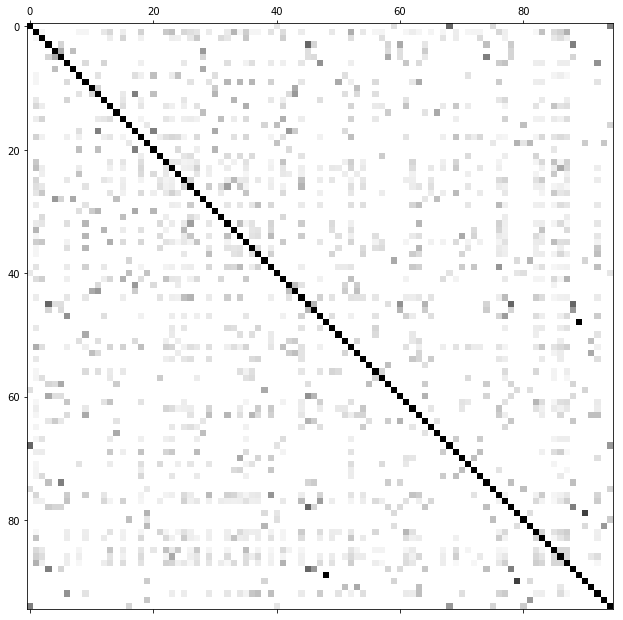

In [95]:
# visualize the matrix
plt.matshow(jaccard, fignum=1000, cmap=plt.cm.binary)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

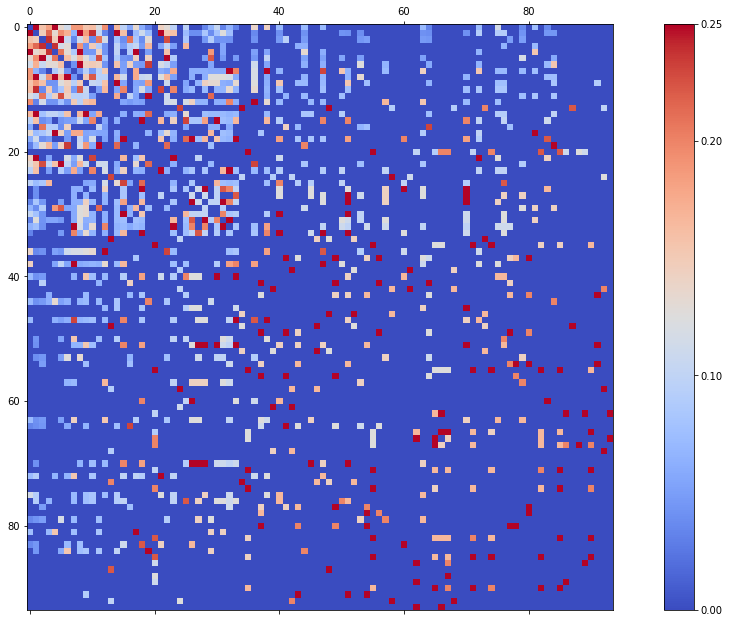

In [96]:
popular_indexing = mostRatedRestaurant[:]
jaccard_sorted = jaccard[:,popular_indexing]
jaccard_sorted_total = jaccard_sorted[popular_indexing, :]

# Remove ones:
jaccard_sorted_total[jaccard_sorted_total == 1.0] = 0.0
cax = plt.matshow(jaccard_sorted_total, fignum=1000, cmap=plt.cm.coolwarm)
plt.gcf().colorbar(cax, ticks=[0, 0.1, 0.2, 0.25])
plt.clim(0, 0.25)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [97]:
Ntop = 5
# Calculate the predictoins with Jaccard
predictions = trainUsersGrouped['placeID'].apply(lambda x: co_occurrance_recommendation(x, jaccard, Ntop))
predictions.head()

0    [27.0, 73.0, 85.0, 41.0, 18.0]
1     [47.0, 41.0, 15.0, 1.0, 87.0]
2     [76.0, 39.0, 52.0, 87.0, 1.0]
3    [26.0, 32.0, 23.0, 13.0, 44.0]
4     [69.0, 35.0, 52.0, 22.0, 8.0]
Name: placeID, dtype: object

In [98]:
testUsersGrouped.values[:3, 1]

array([list([1]), list([33, 1]), list([65, 15, 70])], dtype=object)

In [99]:
predictions[:3]

0    [27.0, 73.0, 85.0, 41.0, 18.0]
1     [47.0, 41.0, 15.0, 1.0, 87.0]
2     [76.0, 39.0, 52.0, 87.0, 1.0]
Name: placeID, dtype: object

In [100]:
for (seen, recom) in zip(testUsersGrouped.values[:3, 1], predictions[:3]):
    print("*"*6)
    print("Seen items: ")
    print([i for i in seen])
    print("Recommended items: ")
    print([i for i in recom])

******
Seen items: 
[1]
Recommended items: 
[27.0, 73.0, 85.0, 41.0, 18.0]
******
Seen items: 
[33, 1]
Recommended items: 
[47.0, 41.0, 15.0, 1.0, 87.0]
******
Seen items: 
[65, 15, 70]
Recommended items: 
[76.0, 39.0, 52.0, 87.0, 1.0]


In [101]:
for k in [3,5,10,30,50,100]:
    print('----------')
    evaluate_recall(k, trainUsersGrouped, testUsersGrouped, jaccard, mostRatedRestaurant[:]);

----------
Co-occurance model: recall@3=0.358
Co-occurance User model: recall@3=0.329
Popularity model: recall@3=0.075
----------
Co-occurance model: recall@5=0.362
Co-occurance User model: recall@5=0.330
Popularity model: recall@5=0.133
----------
Co-occurance model: recall@10=0.264
Co-occurance User model: recall@10=0.244
Popularity model: recall@10=0.173
----------
Co-occurance model: recall@30=0.113
Co-occurance User model: recall@30=0.109
Popularity model: recall@30=0.526
----------
Co-occurance model: recall@50=0.068
Co-occurance User model: recall@50=0.067
Popularity model: recall@50=0.631
----------
Co-occurance model: recall@100=0.036
Co-occurance User model: recall@100=0.036
Popularity model: recall@100=0.939


# Memory-Based Collaborative Filtering (CF)

In [102]:
train.head()

,userID,placeID,rating,food_rating,service_rating
109,63,45,1,2,1
449,121,68,2,2,2
271,24,73,1,2,0
454,13,92,2,1,1
587,33,76,2,1,0


In [103]:
train.values[:,0:3]

array([[ 63,  45,   1],
       [121,  68,   2],
       [ 24,  73,   1],
       ...,
       [ 52,  10,   1],
       [112,  25,   1],
       [ 61,  76,   2]])

In [104]:
n_users = len(userProfile_r['userID'].unique())
uMatrixTraining = np.zeros((n_users, n_items)) # utility matrix
for row in train.values[:,0:3]:
    user = row[0]-1
    item = row[1]
    rating = row[2]
    uMatrixTraining[user, item] = rating

In [105]:
n_users

138

In [106]:
for row in train.values[:,0:3]:
    print(row)

[63 45  1]
[121  68   2]
[24 73  1]
[13 92  2]
[33 76  2]
[95 34  2]
[113  24   2]
[121  40   0]
[15 42  1]
[48 54  0]
[35 38  1]
[133  94   1]
[137  18   2]
[38 15  2]
[95  9  1]
[77 87  2]
[ 6 62  1]
[108  39   2]
[ 9 15  2]
[61 34  2]
[132  67   2]
[ 5 85  2]
[40  0  1]
[112  44   1]
[116  22   2]
[16 15  2]
[59 87  2]
[60 64  2]
[134  49   1]
[32 18  0]
[83 37  2]
[98 85  2]
[33 87  2]
[120  44   1]
[131  30   1]
[73 15  0]
[115  20   0]
[88 20  2]
[62 41  0]
[117  59   1]
[138  65   2]
[88 85  2]
[109  61   1]
[ 3 12  2]
[134  37   2]
[34 36  0]
[59 15  0]
[105   8   0]
[33 62  1]
[48 72  1]
[67 45  0]
[46 77  2]
[118  90   0]
[31 88  0]
[63  3  1]
[99 18  1]
[116  33   0]
[4 2 2]
[37 11  1]
[126  41   2]
[97 34  2]
[47  6  0]
[132  41   2]
[97 77  2]
[ 3 25  2]
[26 89  2]
[111  42   2]
[104  52   1]
[80 66  1]
[19  9  0]
[99 61  1]
[136  77   2]
[89 82  1]
[107  64   2]
[137  52   2]
[79 75  1]
[128   6   0]
[3 1 2]
[31 14  0]
[61 39  2]
[56 67  2]
[8 8 1]
[33 29  2]
[83 39  1]
[

In [107]:
uMatrixTesting = np.zeros((n_users, n_items)) # utility matrix
for row in test.values[:,0:3]:
    # Note user ids start at 1
    user = row[0]-1
    item = row[1]
    rating = row[2]
    uMatrixTesting[user, item] = rating

In [108]:
def cosineSimilarity(ratings, kind='user', epsilon=1e-9):
    """
    Calculate the cosine distance along the row (columns) of a matrix for users (items)
    
    :param ratings: a n_user X n_items matrix
    :param kind: string indicating whether we are in mode 'user' or 'item'
    :param epsilon: a small value to avoid dividing by zero (optional, defaults to 1e-9)
    
    :return a square matrix with the similarities
    """
    # epsilon -> small number for handling dived-by-zero errors
    if kind == 'user':
        sim = ratings.dot(ratings.T)+epsilon
    elif kind == 'item':
        sim = ratings.T.dot(ratings)+epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return sim / norms / norms.T

In [109]:
cosineSimilarity(uMatrixTraining, 'item')

array([[1.00000000e+00, 3.63696484e-11, 6.29940788e-11, ...,
        7.71516750e-11, 1.19522861e-10, 7.41249317e-01],
       [3.63696484e-11, 1.00000000e+00, 3.20750150e-02, ...,
        3.92837101e-11, 6.08580619e-11, 3.77425678e-11],
       [6.29940788e-11, 3.20750150e-02, 1.00000000e+00, ...,
        6.80413817e-11, 1.05409255e-10, 6.53720450e-11],
       ...,
       [7.71516750e-11, 3.92837101e-11, 6.80413817e-11, ...,
        1.00000000e+00, 1.29099445e-10, 8.00640769e-11],
       [1.19522861e-10, 6.08580619e-11, 1.05409255e-10, ...,
        1.29099445e-10, 1.00000000e+00, 1.24034735e-10],
       [7.41249317e-01, 3.77425678e-11, 6.53720450e-11, ...,
        8.00640769e-11, 1.24034735e-10, 1.00000000e+00]])

In [110]:
# we use cosine similarity
userSimilarity = cosineSimilarity(uMatrixTraining, kind='user')

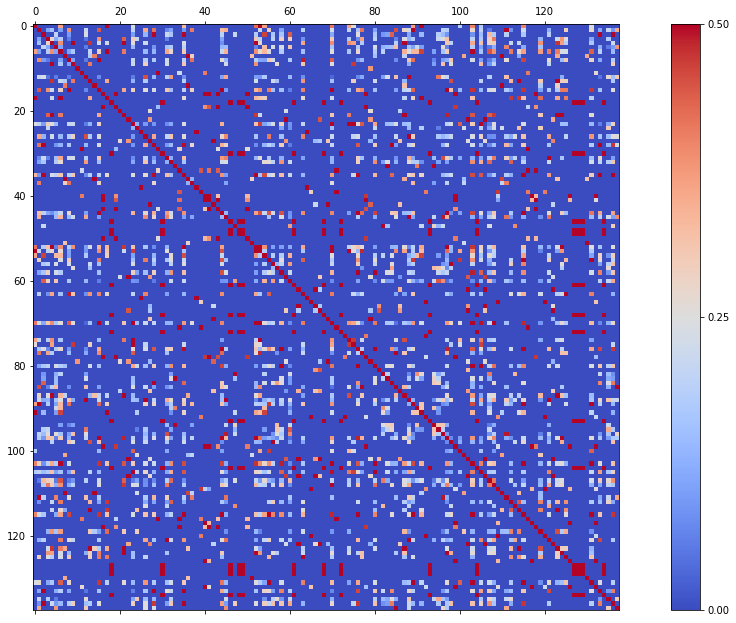

In [111]:
cax = plt.matshow(userSimilarity, fignum=1000, cmap=plt.cm.coolwarm)
plt.gcf().colorbar(cax, ticks=[0, 0.25, 0.5])
plt.clim(0, 0.5)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

In [112]:
np.mean(userSimilarity), np.std(userSimilarity)

(0.05898355043349871, 0.16985106887030454)

In [113]:
print(userSimilarity.shape, uMatrixTraining.shape)

(138, 138) (138, 95)


In [114]:
norm = np.array([userSimilarity.sum(axis=1)]).T

In [115]:
userItemCFpredictions = userSimilarity.dot(uMatrixTraining) / norm

In [116]:
# Be careful: take a look at the values
np.max(userItemCFpredictions), np.min(userItemCFpredictions), np.mean(userItemCFpredictions), np.std(userItemCFpredictions)

(1.85828115738262, 0.0, 0.06745883945085082, 0.17357857744924057)

In [117]:
sum_ = uMatrixTraining.sum(axis=1)
print(sum_)
len_ =np.count_nonzero(uMatrixTraining, axis=1)
len__=np.zeros(len(len_))
for i in range(len(len_)):
    len__[i]=float(len_[i])
    if len_[i]==0:
        len__[i]=0.5
print(len__)
average_ratings = np.tile(sum_// len_, n_items).reshape([n_items, n_users]).T

[ 3. 10. 14. 11.  6. 10.  6.  6.  9.  4.  1.  4. 12.  4.  3. 16.  1.  2.
  0.  5.  4.  1.  2. 12.  9.  4.  8.  5.  7.  3.  0.  8. 11.  1.  6. 15.
  6.  4.  3.  2.  6.  5.  3.  7.  9.  9.  0.  7.  0.  0.  3.  3. 10. 11.
 12.  6.  5.  6. 11.  5. 20.  0.  4.  5.  2.  4.  5.  5.  0.  4. 22.  2.
  0.  2.  4.  6.  5.  7.  4.  5.  5.  1. 10.  7.  6.  7.  9.  7. 11. 12.
  4.  5.  6.  0.  9. 11. 14. 11.  7.  4.  4.  8.  7. 12.  0. 13.  4. 13.
 10.  5.  9.  4.  5.  2.  5. 10.  3.  2.  6.  7.  6.  8.  6.  4.  3.  6.
  2.  0.  0.  0.  1.  8.  5. 11.  0. 13. 16.  4.]
[ 2.   7.   7.   6.   4.   8.   6.   5.   6.   3.   1.   2.   7.   4.
  3.   8.   1.   2.   0.5  3.   2.   1.   1.  11.   5.   2.   8.   4.
  6.   2.   0.5  6.   6.   1.   4.   8.   4.   3.   2.   2.   3.   3.
  3.   4.   6.   7.   0.5  4.   0.5  0.5  3.   2.   6.   6.   6.   3.
  5.   4.   6.   3.  12.   0.5  3.   4.   2.   3.   4.   5.   0.5  3.
 12.   1.   0.5  1.   3.   3.   3.   4.   3.   4.   5.   1.   6.   4.
  3.   5.   7.   4.

/home/javier/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in floor_divide
  # Remove the CWD from sys.path while we load stuff.


In [118]:
np.count_nonzero(uMatrixTraining[18,:])

0

In [119]:
average_ratings[18]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [120]:
uMatrixTraining_shifted = uMatrixTraining - np.multiply(average_ratings, uMatrixTraining)

In [121]:
uMatrixTraining[18] - np.multiply(average_ratings, uMatrixTraining)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., -1., ...,  0.,  0.,  0.],
       [ 0., -4.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -1.,  0.,  0.],
       [ 0., -4.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [122]:
userItemCFpredictions_corrected = average_ratings + userSimilarity.dot(uMatrixTraining_shifted) / norm

In [123]:
# Now rating values are more reasonable
np.max(userItemCFpredictions_corrected), np.min(userItemCFpredictions_corrected), np.mean(userItemCFpredictions_corrected), np.std(userItemCFpredictions_corrected)

/home/javier/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(nan, nan, nan, nan)

In [124]:
userSimilarity.dot(uMatrixTraining_shifted)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [125]:
for i in range(138):
    print(i)
    print(uMatrixTraining_shifted[i])

0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
[ 0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.
  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]
3
[0. 0. 0. 0. 0. 0. 0. 0. 

In [126]:
userSimilarity.shape

(138, 138)